In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    random_unitary,
    simulation)

In [13]:
five_orderings = orders.n_random_c5_orders(12,101)

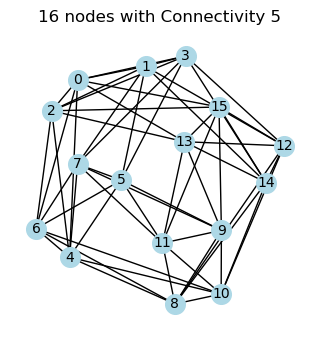

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# The data containing two arrays
data = orders.n_random_c7_orders(16,1001)
# data = orders.n_random_line_orders(16,n = 1000,chunk_sizes = [4,4,4,4])

# Iterate through the data arrays
for array in data:
    # For each group in the array
    for group in array:
        # Create edges between nodes in the same group
        for i in range(len(group)):
            for j in range(i + 1, len(group)):
                G.add_edge(group[i], group[j])

# Plot the graph
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(G, seed=42)  # Define the layout for the nodes

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.title("16 nodes with Connectivity 5")
plt.show()


In [5]:
def cay(n,s):
    """
    s must NOT include the identity (0) and s must be the same as s inverse.
    """
    G = nx.Graph()
    
    for node in range(n):
        for m in s:
            G.add_edge(node,(node+m)%n)
    return(G)

def cay(n,s):
    """
    s must NOT include the identity (0) and s must be the same as s inverse.
    """
    n = np.array(n)
    np.pad(n, (3, 3), 'constant', constant_values=(0, 0))
    print(n)
    s = [np.array(e) for e in s]
    G = nx.Graph()
    
    for id0 in range(n[0]):
        for id1 in range(n[1]):
            for id2 in range(n[2]):
                for m in s:
                    node = np.array([id0,id1,id2])
                    G.add_edge(tuple(node),tuple((node+m)%n))
    return(G)

# g = cay([8],[-3,-2,-1,1,2,3])
# plt.figure(1,figsize=(3,3))
# pos = nx.circular_layout(g)  # Define the layout for the nodes

# nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
# plt.show()

# g = cay(8,[3,5,1,7,2,6])
# plt.figure(1,figsize=(3,3))
# pos = nx.circular_layout(g)  # Define the layout for the nodes

# nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
# plt.show()

# g = cay(8,[3,5,1,7,4,2,6])
# plt.figure(1,figsize=(3,3))
# pos = nx.circular_layout(g)  # Define the layout for the nodes

# nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)

[2 2 8]


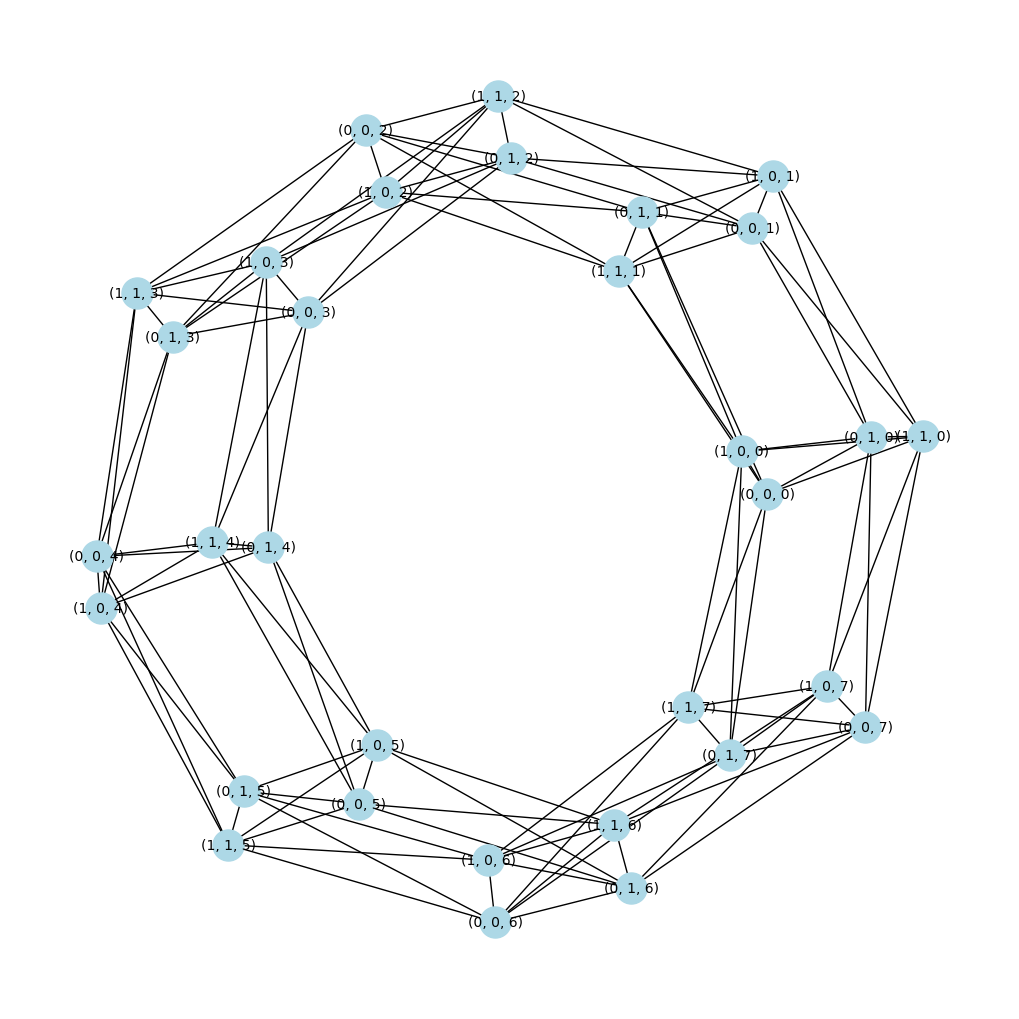

[1 2 8]


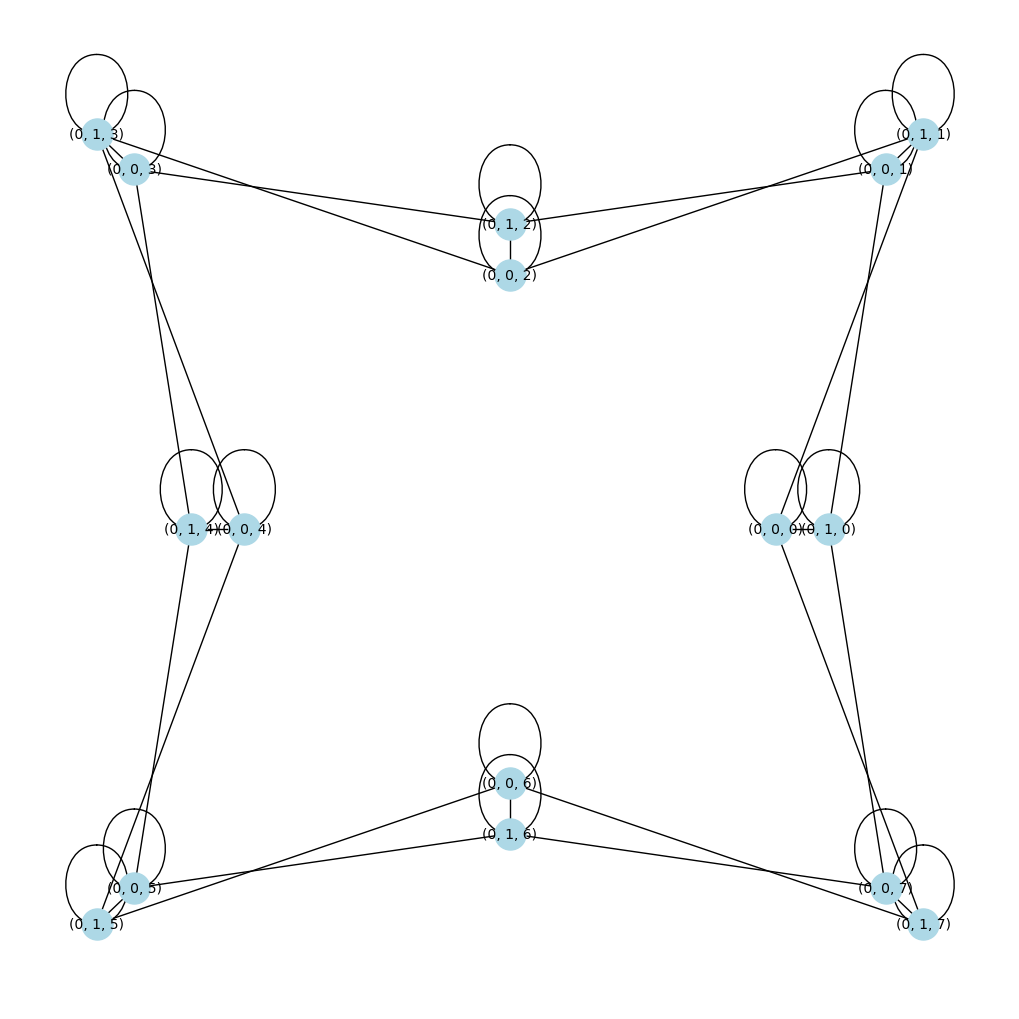

In [13]:
N = 8
g = cay([2,2,N],[[1,0,0],[0,1,0],[1,1,0],[0,1,1],[0,1,-1],[1,1,1],[1,1,-1]])
plt.figure(1,figsize=(10,10))
pos = dict()
r = 1
for i0 in range(2):
    for i1 in range(2):
        for i2 in range(N):
            theta = i2/N*2*np.pi
            # theta+=i1/5
            
            r = 1+.2*i1+(i2%2)
            pos[(i0,i1,i2)] = [r*np.cos(theta),r*np.sin(theta)]
    
nx.draw(g,with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()

N = 8
g = cay([1,2,N],[[1,0,0],[0,1,0],[1,1,0],[0,1,1],[0,1,-1],[1,1,1],[1,1,-1]])
plt.figure(1,figsize=(10,10))
pos = dict()
r = 1
for i0 in range(2):
    for i1 in range(2):
        for i2 in range(N):
            theta = i2/N*2*np.pi
            # theta+=i1/5
            
            r = 1+.2*i1+(i2%2)
            pos[(i0,i1,i2)] = [r*np.cos(theta),r*np.sin(theta)]
    
nx.draw(g,pos=pos,with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()




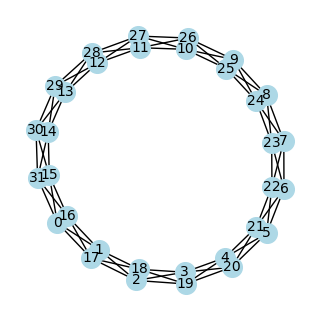

In [46]:
n = 32
g = cay(n,[1,n//2+1,n//2,n//2-1,n-1])
# g = cay(16,[1,15,2,14,8])
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(g)  # Define the layout for the nodes

nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()

[ 1  1 32]


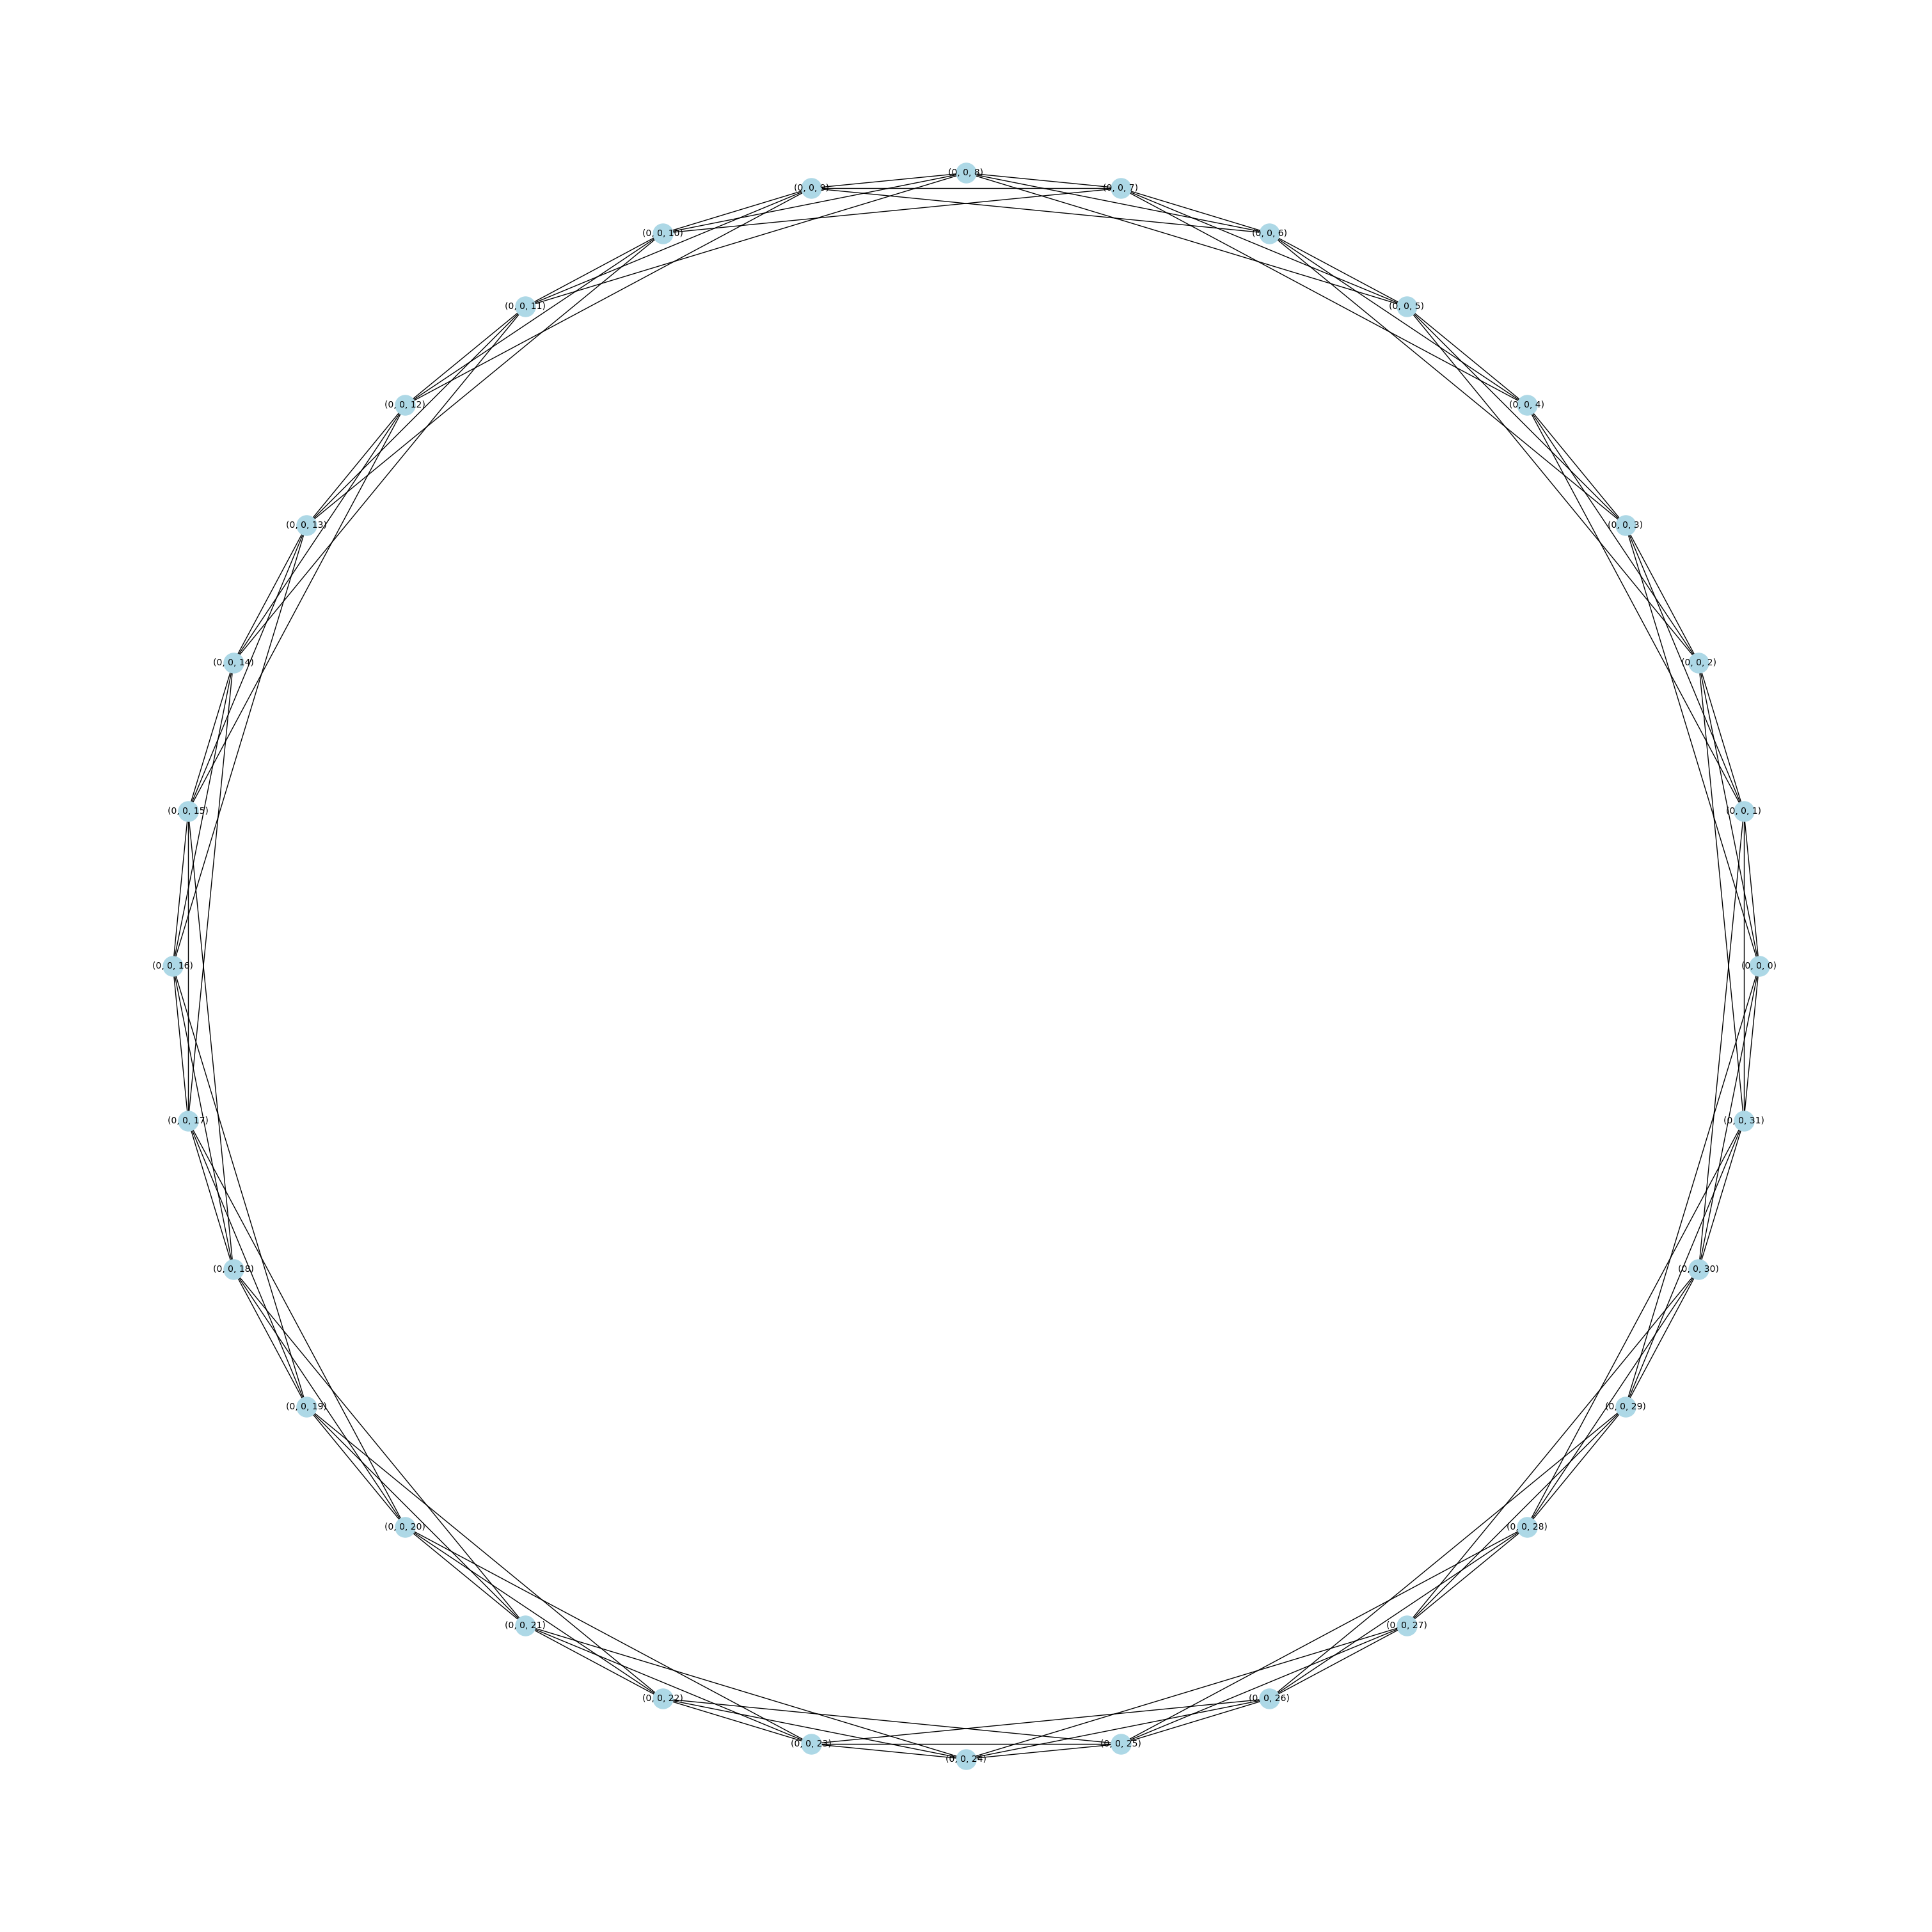

In [76]:
N = 32
g = cay([2,2,N],[[1,0,0],[1,1,0],[0,1,0],[1,1,1],[1,1,-1],[1,1,1]])
plt.figure(1,figsize=(30,30))
pos = dict()
r = 1
for index in range(N):
    theta = index/N*2*np.pi
    pos[(0,0,index)] = [r*np.cos(theta),r*np.sin(theta)]
    
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()


In [52]:
np.arange(4)%np.array([2,2,3,2])

array([0, 1, 2, 1])

In [71]:
tuple(np.array([0,1,4]))

(0, 1, 4)